# Evaluacion de los modelos

## lectura de los csv por numero de intento

In [5]:
#%%
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances, plot_slice, plot_contour
from time import time
import pickle
import os
from dotenv import load_dotenv
import urllib
import lgbm_globales
import funciones_lgbm

study = optuna.create_study(
    direction="maximize",
    study_name= "lgbm_binaria_t3",
    storage= "",
    load_if_exists=True
)

ModuleNotFoundError: No module named 'lgbm_globales'

In [26]:

def read_files_as_dataframes(directory_path, file_extension='.csv'):
    dataframes = []
    
    # Iterate over all files in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith(file_extension):
            file_path = os.path.join(directory_path, filename)
            # Read the file as a Pandas DataFrame
            df = pd.read_csv(file_path)
            df.rename(columns={'public_cum':'public_score_acumulado',
                               'private_cum':'private_score_acumulado'}, inplace=True)
            df['model'] = filename.replace('df_cut_point-lgbm_binaria_', '')
            dataframes.append(df)
    
    return dataframes

# Example usage
directory_path = '../testing'
dataframes = read_files_as_dataframes(directory_path)




In [27]:
dataframes[0].head()

,ganancia,y_pred_lgm,public,private,nro_envios,public_score_acumulado,private_score_acumulado,model
0,-7000,0.911269,0.0,-10000.0,0,0.0,-10000.0,t3-0-208961.csv
1,-7000,0.904424,0.0,-10000.0,1,0.0,-20000.0,t3-0-208961.csv
2,-7000,0.900890,0.0,-10000.0,2,0.0,-30000.0,t3-0-208961.csv
3,-7000,0.895739,0.0,-10000.0,3,0.0,-40000.0,t3-0-208961.csv
4,-7000,0.895727,0.0,-10000.0,4,0.0,-50000.0,t3-0-208961.csv


In [28]:
def plot_dataframes(dataframes):
    plt.figure(figsize=(10, 6))
    for i, df in enumerate(dataframes):
        plt.plot(df['nro_envios'], df['public_score_acumulado'], label=f'Public {df['model'].unique()}')
        plt.plot(df['nro_envios'], df['private_score_acumulado'], label=f'Private {df['model'].unique()}')
    
    plt.title('Public and Private Scores')
    plt.xlabel('Envios')
    plt.ylabel('Scores')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

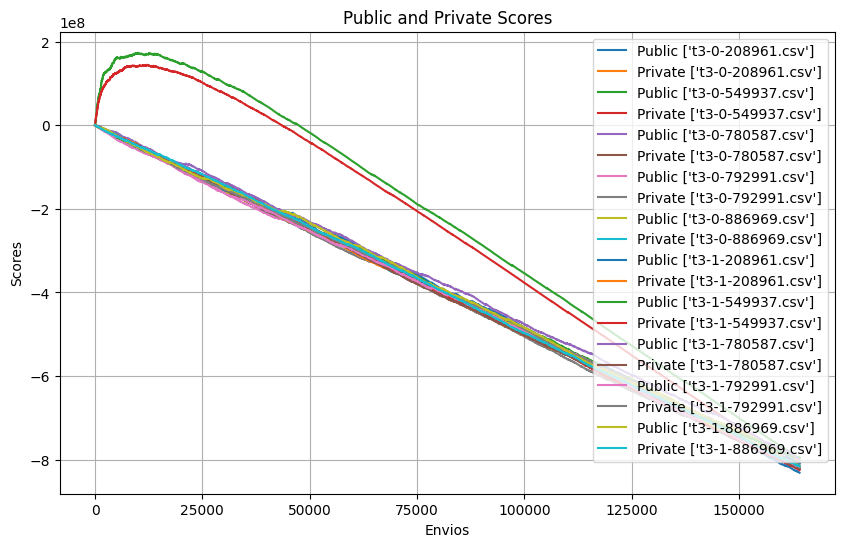

In [29]:
plot_dataframes(dataframes)

In [36]:
# bind all dataframes together
df = pd.concat(dataframes)
df.sort_values(by='private_score_acumulado', ascending=False)

,ganancia,y_pred_lgm,public,private,nro_envios,public_score_acumulado,private_score_acumulado,model
12196,273000,2.515316e-02,0.000000,390000.0,12196,1.702167e+08,144280000.0,t3-0-549937.csv
12199,-7000,2.514893e-02,-23333.333333,0.0,12199,1.701700e+08,144270000.0,t3-0-549937.csv
12197,-7000,2.515217e-02,0.000000,-10000.0,12197,1.702167e+08,144270000.0,t3-0-549937.csv
12198,-7000,2.515117e-02,-23333.333333,0.0,12198,1.701933e+08,144270000.0,t3-0-549937.csv
12200,-7000,2.514799e-02,0.000000,-10000.0,12200,1.701700e+08,144260000.0,t3-0-549937.csv
...,...,...,...,...,...,...,...,...
164084,-7000,4.332231e-07,-23333.333333,0.0,164084,-7.948733e+08,-824590000.0,t3-1-549937.csv
164086,-7000,4.001378e-07,0.000000,-10000.0,164086,-7.948967e+08,-824600000.0,t3-1-549937.csv
164087,-7000,3.990194e-07,0.000000,-10000.0,164087,-7.948967e+08,-824610000.0,t3-1-549937.csv
164088,-7000,3.921679e-07,0.000000,-10000.0,164088,-7.948967e+08,-824620000.0,t3-1-549937.csv
